<a href="https://www.kaggle.com/cv13j0/spaceship-my-starter-model?scriptVersionId=89443980" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌌 Spaceship My Starter Model

Hello a Simple Starter Model, **Stay Tune for More Updates...**

### File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.

* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.

# Loading Libraries...

In [1]:
%%time
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
CPU times: user 5 µs, sys: 897 µs, total: 902 µs
Wall time: 1.27 ms


# Seeting Notebook Parameters...

In [2]:
%%time
# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

CPU times: user 34 µs, sys: 3 µs, total: 37 µs
Wall time: 41.5 µs


In [3]:
%%time
# Notebook Configuration...

# Amount of data we want to load into the Model...
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize...
NROWS = 50
NCOLS = 15
# Main data location path...
BASE_PATH = '...'

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [4]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 69 µs, sys: 7 µs, total: 76 µs
Wall time: 79.9 µs


# Loading Information from CSV...

In [5]:
%%time
trn_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
tst_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

CPU times: user 34.9 ms, sys: 12 ms, total: 46.9 ms
Wall time: 73.5 ms


# Exploring the Information Available...

In [6]:
%%time
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
CPU times: user 18.6 ms, sys: 2.74 ms, total: 21.3 ms
Wall time: 32.4 ms


In [7]:
%%time
trn_data.head()

CPU times: user 103 µs, sys: 11 µs, total: 114 µs
Wall time: 118 µs


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [8]:
%%time
trn_data.describe()

CPU times: user 14.7 ms, sys: 175 µs, total: 14.8 ms
Wall time: 16.5 ms


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


In [9]:
%%time
def describe_categ(df):
    for col in df.columns:
        unique_samples = list(df[col].unique())
        unique_values = df[col].nunique()

        print(f' {col}: {unique_values} Unique Values,  Data Sample >> {unique_samples[:5]}')
    print(' ...')
    return None

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [10]:
%%time
describe_categ(trn_data)

 PassengerId: 8693 Unique Values,  Data Sample >> ['0001_01', '0002_01', '0003_01', '0003_02', '0004_01']
 HomePlanet: 3 Unique Values,  Data Sample >> ['Europa', 'Earth', 'Mars', nan]
 CryoSleep: 2 Unique Values,  Data Sample >> [False, True, nan]
 Cabin: 6560 Unique Values,  Data Sample >> ['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P']
 Destination: 3 Unique Values,  Data Sample >> ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]
 Age: 80 Unique Values,  Data Sample >> [39.0, 24.0, 58.0, 33.0, 16.0]
 VIP: 2 Unique Values,  Data Sample >> [False, True, nan]
 RoomService: 1273 Unique Values,  Data Sample >> [0.0, 109.0, 43.0, 303.0, 42.0]
 FoodCourt: 1507 Unique Values,  Data Sample >> [0.0, 9.0, 3576.0, 1283.0, 70.0]
 ShoppingMall: 1115 Unique Values,  Data Sample >> [0.0, 25.0, 371.0, 151.0, 3.0]
 Spa: 1327 Unique Values,  Data Sample >> [0.0, 549.0, 6715.0, 3329.0, 565.0]
 VRDeck: 1306 Unique Values,  Data Sample >> [0.0, 44.0, 49.0, 193.0, 2.0]
 Name: 8473 Unique Values,  Data S

In [11]:
%%time
describe_categ(tst_data)

 PassengerId: 4277 Unique Values,  Data Sample >> ['0013_01', '0018_01', '0019_01', '0021_01', '0023_01']
 HomePlanet: 3 Unique Values,  Data Sample >> ['Earth', 'Europa', 'Mars', nan]
 CryoSleep: 2 Unique Values,  Data Sample >> [True, False, nan]
 Cabin: 3265 Unique Values,  Data Sample >> ['G/3/S', 'F/4/S', 'C/0/S', 'C/1/S', 'F/5/S']
 Destination: 3 Unique Values,  Data Sample >> ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan]
 Age: 79 Unique Values,  Data Sample >> [27.0, 19.0, 31.0, 38.0, 20.0]
 VIP: 2 Unique Values,  Data Sample >> [False, nan, True]
 RoomService: 842 Unique Values,  Data Sample >> [0.0, 10.0, 339.0, 932.0, 2.0]
 FoodCourt: 902 Unique Values,  Data Sample >> [0.0, 9.0, 6652.0, 1615.0, nan]
 ShoppingMall: 715 Unique Values,  Data Sample >> [0.0, 635.0, 263.0, 136.0, nan]
 Spa: 833 Unique Values,  Data Sample >> [0.0, 2823.0, 181.0, 113.0, 237.0]
 VRDeck: 796 Unique Values,  Data Sample >> [0.0, 585.0, 60.0, 1010.0, 224.0]
 Name: 4176 Unique Values,  Data Samp

In [12]:
%%time
trn_data.isnull().sum()

CPU times: user 7.42 ms, sys: 938 µs, total: 8.36 ms
Wall time: 7.95 ms


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
%%time
tst_data.head()

CPU times: user 122 µs, sys: 0 ns, total: 122 µs
Wall time: 126 µs


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,"2,823.00",0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,"6,652.00",0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [14]:
%%time
tst_data.isnull().sum()

CPU times: user 4.81 ms, sys: 0 ns, total: 4.81 ms
Wall time: 5.33 ms


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [15]:
%%time
sub.sample(10)

CPU times: user 844 µs, sys: 0 ns, total: 844 µs
Wall time: 1.91 ms


,PassengerId,Transported
2619,5745_01,False
4171,9053_01,False
1199,2529_01,False
1677,3601_06,False
1558,3355_01,False
2800,6196_01,False
1695,3633_01,False
1800,3840_01,False
764,1554_01,False
25,0055_01,False


# Exploring the Target Variable...

In [16]:
%%time
def analyse_categ_target(df, target = 'Transported'):
    
    transported = df[df[target] == True].shape[0]
    not_transported = df[df[target] == False].shape[0]
    total = transported + not_transported
    
    print(f'Transported     : {transported / total:.2f} %')
    print(f'Not Transported : {not_transported / total:.2f} %')
    print(f'Total Passengers: {total}')
    print('...')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


In [17]:
%%time
analyse_categ_target(trn_data)

Transported     : 0.50 %
Not Transported : 0.50 %
Total Passengers: 8693
...
CPU times: user 2.45 ms, sys: 2.17 ms, total: 4.62 ms
Wall time: 5.11 ms


In [18]:
%%time
trn_passenger_ids = set(trn_data['PassengerId'].unique())
tst_passenger_ids = set(tst_data['PassengerId'].unique())
intersection = trn_passenger_ids.intersection(tst_passenger_ids)
print('Overlapped Passengers:', len(intersection))

Overlapped Passengers: 0
CPU times: user 4.35 ms, sys: 0 ns, total: 4.35 ms
Wall time: 3.76 ms


# Feature Engineering...

In [19]:
%%time
def fill_missing(df):
    '''
    Fill nan values or missing data with mean or most commond value...
    
    '''
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_tmp = df.select_dtypes(include = numerics)
    categ_tmp = df.select_dtypes(exclude = numerics)

    for col in numeric_tmp.columns:
        print(col)
        df[col] = df[col].fillna(value = df[col].mean())
        
    for col in categ_tmp.columns:
        print(col)
        df[col] = df[col].fillna(value = df[col].mode()[0])
        
    print('...')
    
    return df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [20]:
%%time
trn_data =  fill_missing(trn_data)
tst_data =  fill_missing(tst_data)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Transported
...
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
...
CPU times: user 64.8 ms, sys: 4.28 ms, total: 69 ms
Wall time: 64.8 ms


In [21]:
%%time
def total_billed(df):
    '''
    Calculates total amount billed in the trip to the passenger... 
    Args:
    Returns:
    
    '''
    
    df['Total_Billed'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 14.3 µs


In [22]:
%%time
trn_data = total_billed(trn_data)
tst_data = total_billed(tst_data)

CPU times: user 3.51 ms, sys: 53 µs, total: 3.56 ms
Wall time: 3.14 ms


In [23]:
%%time
def name_ext(df):
    '''
    Split the Name of the passenger into First and Family...
    
    '''
    
    df['FirstName'] = df['Name'].str.split(' ', expand=True)[0]
    df['FamilyName'] = df['Name'].str.split(' ', expand=True)[1]
    df.drop(columns = ['Name'], inplace = True)
    return df

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [24]:
%%time
trn_data = name_ext(trn_data)
tst_data = name_ext(tst_data)

CPU times: user 130 ms, sys: 996 µs, total: 131 ms
Wall time: 130 ms


In [25]:
%%time
trn_relatives = trn_data.groupby('FamilyName')['PassengerId'].count().reset_index()
tst_relatives = tst_data.groupby('FamilyName')['PassengerId'].count().reset_index()

CPU times: user 11.9 ms, sys: 88 µs, total: 12 ms
Wall time: 11.5 ms


In [26]:
%%time
trn_relatives = trn_relatives.rename(columns = {'PassengerId': 'NumRelatives'})
tst_relatives = tst_relatives.rename(columns = {'PassengerId': 'NumRelatives'})

CPU times: user 1.17 ms, sys: 17 µs, total: 1.18 ms
Wall time: 1.11 ms


In [27]:
%%time
trn_data = trn_data.merge(trn_relatives, how = 'left', on = ['FamilyName'])
tst_data = tst_data.merge(tst_relatives, how = 'left', on = ['FamilyName'])

CPU times: user 13.3 ms, sys: 2.03 ms, total: 15.3 ms
Wall time: 19 ms


In [28]:
%%time
def cabin_separation(df):
    '''
    Split the Cabin name into Deck, Number and Side
    
    '''
    
    df['CabinDeck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['CabinNum'] = df['Cabin'].str.split('/', expand=True)[1]
    df['CabinSide'] = df['Cabin'].str.split('/', expand=True)[2]
    df.drop(columns = ['Cabin'], inplace = True)
    return df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [29]:
%%time
trn_data = cabin_separation(trn_data)
tst_data = cabin_separation(tst_data)

CPU times: user 61.6 ms, sys: 1.03 ms, total: 62.6 ms
Wall time: 62.2 ms


In [30]:
%%time
def route(df):
    '''
    Calculate a combination of origin and destinations, creates a new feature for training.
    Args:
    Returns:
    '''
    
    df['Route'] = df['HomePlanet'] + df['Destination']
    return df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [31]:
%%time
trn_data = route(trn_data)
tst_data = route(tst_data)

CPU times: user 2.95 ms, sys: 999 µs, total: 3.94 ms
Wall time: 3.51 ms


In [32]:
def age_groups(df):
    '''
    
    '''
    df['IsKid'] = np.where(df['Age'] <= 10, 1, 0)
    df['IsAdult'] = np.where(df['Age'] > 10, 1, 0)
    df['IsOlder'] = np.where(df['Age'] >= 65, 1, 0)
    return df

In [33]:
%%time
trn_data = age_groups(trn_data)
tst_data = age_groups(tst_data)

CPU times: user 3.85 ms, sys: 1.09 ms, total: 4.94 ms
Wall time: 4.67 ms


# Pre-Processing for Training

In [34]:
%%time
# A list of the original variables from the dataset
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Billed']

categorical_features = ['FirstName',
                        'FamilyName',
                        'CabinNum',]


categorical_features_onehot = ['HomePlanet',
                               'CryoSleep',
                               'CabinDeck',
                               'CabinSide',
                               'Destination',
                               'VIP',]

target_feature = 'Transported'

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [35]:
%%time
from sklearn.preprocessing import LabelEncoder 

def encode_categorical(train_df, test_df, categ_feat = categorical_features):
    '''
    
    '''
    encoder_dict = {}
    
    concat_data = pd.concat([trn_data[categ_feat], tst_data[categ_feat]])
    
    for col in concat_data.columns:
        print('Encoding: ', col, '...')
        encoder = LabelEncoder()
        encoder.fit(concat_data[col])
        encoder_dict[col] = encoder

        train_df[col + '_Enc'] = encoder.transform(train_df[col])
        test_df[col + '_Enc'] = encoder.transform(test_df[col])
    
    train_df = train_df.drop(columns = categ_feat, axis = 1)
    test_df = test_df.drop(columns = categ_feat, axis = 1)

    return train_df, test_df

CPU times: user 313 ms, sys: 159 ms, total: 472 ms
Wall time: 709 ms


In [36]:
%%time
trn_data, tst_data = encode_categorical(trn_data, tst_data, categorical_features)

Encoding:  FirstName ...
Encoding:  FamilyName ...
Encoding:  CabinNum ...
CPU times: user 31.4 ms, sys: 3.17 ms, total: 34.6 ms
Wall time: 32.8 ms


In [37]:
def one_hot(df, one_hot_categ):
    for col in one_hot_categ:
        tmp = pd.get_dummies(df[col], prefix = col)
        df = pd.concat([df, tmp], axis = 1)
    df = df.drop(columns = one_hot_categ)
    return df

In [38]:
trn_data = one_hot(trn_data, categorical_features_onehot) 
tst_data = one_hot(tst_data, categorical_features_onehot) 

In [39]:
trn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   bool   
 8   Total_Billed               8693 non-null   float64
 9   NumRelatives               8693 non-null   int64  
 10  Route                      8693 non-null   object 
 11  IsKid                      8693 non-null   int64  
 12  IsAdult                    8693 non-null   int64  
 13  IsOlder                    8693 non-null   int64

# Simple CV Sttrategy 80/20 Split

In [40]:
%%time
trn_data.columns

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.4 µs


Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'Total_Billed', 'NumRelatives', 'Route',
       'IsKid', 'IsAdult', 'IsOlder', 'FirstName_Enc', 'FamilyName_Enc',
       'CabinNum_Enc', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'CabinDeck_A',
       'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E',
       'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T', 'CabinSide_P',
       'CabinSide_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

In [41]:
%%time
remove = ['PassengerId','Route','FirstName_Enc','Transported']
features = [feat for feat in trn_data.columns if feat not in remove]

CPU times: user 33 µs, sys: 4 µs, total: 37 µs
Wall time: 40.8 µs


In [42]:
%%time
features

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Total_Billed',
 'NumRelatives',
 'IsKid',
 'IsAdult',
 'IsOlder',
 'FamilyName_Enc',
 'CabinNum_Enc',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'CabinDeck_A',
 'CabinDeck_B',
 'CabinDeck_C',
 'CabinDeck_D',
 'CabinDeck_E',
 'CabinDeck_F',
 'CabinDeck_G',
 'CabinDeck_T',
 'CabinSide_P',
 'CabinSide_S',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True']

In [43]:
%%time
from sklearn.model_selection import train_test_split
test_size_pct = 0.10
X_train, X_valid, y_train, y_valid = train_test_split(trn_data[features], trn_data[target_feature], test_size = test_size_pct, random_state = 42)

CPU times: user 12.8 ms, sys: 8.64 ms, total: 21.4 ms
Wall time: 41.3 ms


# Training a ML Classifier

In [44]:
%%time
X_train.shape

CPU times: user 19 µs, sys: 3 µs, total: 22 µs
Wall time: 24.8 µs


(7823, 33)

In [45]:
%%time
from xgboost  import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

CPU times: user 1.12 s, sys: 166 ms, total: 1.28 s
Wall time: 2.32 s


In [46]:
%%time
param = {'learning_rate': 0.05,
         'n_estimators': 1024,
         'n_jobs': -1,
         'random_state': 42,
         'objective': 'binary:logistic',
        }

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


In [47]:
%%time
cls = XGBClassifier(**param)
cls.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['logloss'], early_stopping_rounds = 128, verbose = False)

CPU times: user 5.95 s, sys: 119 ms, total: 6.07 s
Wall time: 3.89 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1024, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
%%time
from sklearn.metrics import accuracy_score

val_preds = cls.predict(X_valid[features])
val_preds = val_preds.astype('bool')
accuracy = accuracy_score(val_preds, y_valid)

CPU times: user 8.76 ms, sys: 0 ns, total: 8.76 ms
Wall time: 6.72 ms


In [49]:
%%time
print(f'Mean accuracy score: {accuracy}')

Mean accuracy score: 0.7908045977011494
CPU times: user 517 µs, sys: 0 ns, total: 517 µs
Wall time: 393 µs


In [50]:
# Mean accuracy score: 0.7586206896551724
# Mean accuracy score: 0.7586206896551724
# Mean accuracy score: 0.7471264367816092
# Mean accuracy score: 0.7816091954022989
# Mean accuracy score: 0.7827586206896552
# Mean accuracy score: 0.7908045977011494 (One Hot Encode...)

In [51]:
%%time
import matplotlib.pyplot as plt

def feature_importance(clf):
    importances = clf.feature_importances_
    i = np.argsort(importances)
    features = X_train.columns
    plt.title('Feature Importance')
    plt.barh(range(len(i)), importances[i], align='center')
    plt.yticks(range(len(i)), [features[x] for x in i])
    plt.xlabel('Scale')
    plt.show()

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.5 µs


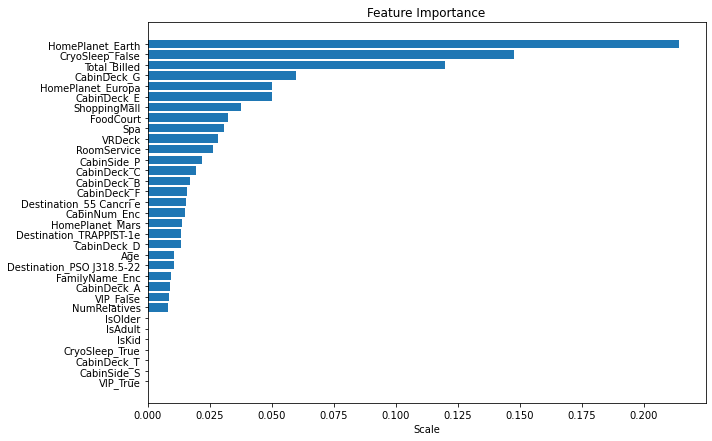

CPU times: user 393 ms, sys: 94.3 ms, total: 487 ms
Wall time: 366 ms


In [52]:
%%time
plt.figure(figsize = (10,7))
feature_importance(cls)

In [53]:
%%time
preds = cls.predict(tst_data[features])

CPU times: user 21.8 ms, sys: 895 µs, total: 22.7 ms
Wall time: 13.8 ms


In [54]:
%%time
sub['Transported'] = preds
sub.to_csv('submission_simple_split_03052022.csv', index = False)

CPU times: user 9.77 ms, sys: 38 µs, total: 9.81 ms
Wall time: 9.99 ms


# Time for Optuna

In [55]:
%%time
import optuna

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


In [56]:
%%time
X_train, X_valid, y_train, y_valid = train_test_split(trn_data[features], trn_data[target_feature])

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 8, 2048)
    max_depth = trial.suggest_int("max_depth", 2, 16)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
    subsample = trial.suggest_float("subsample", 0.5, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1)
    reg_lambda = trial.suggest_float("reg_lambda", 1, 20)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 20)
    gamma = trial.suggest_float("gamma", 0, 20)
    min_child_weight  = trial.suggest_int("min_child_weight", 0, 128)
    
    clf = XGBClassifier(n_estimators  = n_estimators,
                       learning_rate = learning_rate,
                       max_depth = max_depth,
                       subsample = subsample,
                       colsample_bytree = colsample_bytree,
                       reg_lambda = reg_lambda,
                       reg_alpha = reg_alpha,
                       gamma = gamma,
                       min_child_weight = min_child_weight,
                       random_state  = 69,
                       objective = 'binary:logistic',
                       tree_method = 'gpu_hist',
                      )
    
    clf.fit(X_train, y_train)
    
    valid_pred = clf.predict(X_valid)
    score = accuracy_score(y_valid, valid_pred)
    
    return score

CPU times: user 5.72 ms, sys: 0 ns, total: 5.72 ms
Wall time: 5.42 ms


In [57]:
%%time
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)

[I 2022-03-06 21:42:27,312] A new study created in memory with name: no-name-3fd6d91c-e572-4885-bd5c-48708c68c39f


[21:42:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:28,487] Trial 0 finished with value: 0.7943882244710212 and parameters: {'n_estimators': 922, 'max_depth': 3, 'learning_rate': 0.14318449589486065, 'subsample': 0.8588156533518319, 'colsample_bytree': 0.6954878817789216, 'reg_lambda': 16.434615707158596, 'reg_alpha': 15.33254659562002, 'gamma': 4.079738108456803, 'min_child_weight': 15}. Best is trial 0 with value: 0.7943882244710212.


[21:42:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:29,394] Trial 1 finished with value: 0.7953081876724931 and parameters: {'n_estimators': 1513, 'max_depth': 10, 'learning_rate': 0.19187864881387784, 'subsample': 0.7230021067170036, 'colsample_bytree': 0.6993014334460164, 'reg_lambda': 2.942767915564593, 'reg_alpha': 12.683355184688152, 'gamma': 15.407843197681942, 'min_child_weight': 10}. Best is trial 1 with value: 0.7953081876724931.


[21:42:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:30,210] Trial 2 finished with value: 0.7690892364305428 and parameters: {'n_estimators': 967, 'max_depth': 12, 'learning_rate': 0.022373609636936263, 'subsample': 0.5921472569684187, 'colsample_bytree': 0.9603485577735076, 'reg_lambda': 18.849237802730986, 'reg_alpha': 13.275848296685899, 'gamma': 1.5805882091246937, 'min_child_weight': 105}. Best is trial 1 with value: 0.7953081876724931.


[21:42:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:30,578] Trial 3 finished with value: 0.7769089236430543 and parameters: {'n_estimators': 370, 'max_depth': 3, 'learning_rate': 0.010466195423927366, 'subsample': 0.9000115740587618, 'colsample_bytree': 0.9463886183888346, 'reg_lambda': 18.54618309595563, 'reg_alpha': 4.753549533692116, 'gamma': 9.782018036002453, 'min_child_weight': 116}. Best is trial 1 with value: 0.7953081876724931.


[21:42:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:30,847] Trial 4 finished with value: 0.7833486660533578 and parameters: {'n_estimators': 402, 'max_depth': 9, 'learning_rate': 0.1387352639131448, 'subsample': 0.7874116941974985, 'colsample_bytree': 0.5918603905116335, 'reg_lambda': 14.159369450824906, 'reg_alpha': 13.943181810332774, 'gamma': 18.07013627014044, 'min_child_weight': 58}. Best is trial 1 with value: 0.7953081876724931.


[21:42:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:31,401] Trial 5 finished with value: 0.7580496780128795 and parameters: {'n_estimators': 858, 'max_depth': 13, 'learning_rate': 0.10822306156953217, 'subsample': 0.5533060610385011, 'colsample_bytree': 0.620959390853507, 'reg_lambda': 14.603030235269872, 'reg_alpha': 0.8857994342946229, 'gamma': 16.132324226637408, 'min_child_weight': 117}. Best is trial 1 with value: 0.7953081876724931.


[21:42:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:31,668] Trial 6 finished with value: 0.781048758049678 and parameters: {'n_estimators': 248, 'max_depth': 14, 'learning_rate': 0.08010019700365148, 'subsample': 0.8158155662258718, 'colsample_bytree': 0.6089762478670011, 'reg_lambda': 8.149720162617424, 'reg_alpha': 18.484167714917284, 'gamma': 16.174957074968997, 'min_child_weight': 86}. Best is trial 1 with value: 0.7953081876724931.


[21:42:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:33,756] Trial 7 finished with value: 0.7764489420423183 and parameters: {'n_estimators': 1675, 'max_depth': 6, 'learning_rate': 0.03872550162516888, 'subsample': 0.5221132964205104, 'colsample_bytree': 0.9613214692213687, 'reg_lambda': 16.812330567263288, 'reg_alpha': 1.0556006993262246, 'gamma': 0.23844593464908526, 'min_child_weight': 100}. Best is trial 1 with value: 0.7953081876724931.


[21:42:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:34,758] Trial 8 finished with value: 0.7888684452621895 and parameters: {'n_estimators': 1611, 'max_depth': 11, 'learning_rate': 0.10534622253155816, 'subsample': 0.6470496440475466, 'colsample_bytree': 0.963446625893035, 'reg_lambda': 5.784721736189493, 'reg_alpha': 2.2015998160857864, 'gamma': 10.043399231903859, 'min_child_weight': 55}. Best is trial 1 with value: 0.7953081876724931.
[I 2022-03-06 21:42:34,910] Trial 9 finished with value: 0.7934682612695492 and parameters: {'n_estimators': 141, 'max_depth': 14, 'learning_rate': 0.10050612630595145, 'subsample': 0.5091706766724172, 'colsample_bytree': 0.6519524976091036, 'reg_lambda': 6.462596550216366, 'reg_alpha': 6.873930827206227, 'gamma': 6.897805947469338, 'min_child_weight': 32}. Best is trial 1 with value: 0.7953081876724931.


[21:42:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:36,123] Trial 10 finished with value: 0.7948482060717571 and parameters: {'n_estimators': 1987, 'max_depth': 8, 'learning_rate': 0.19389362358704318, 'subsample': 0.669124376180958, 'colsample_bytree': 0.8047233505999415, 'reg_lambda': 1.2417727932813178, 'reg_alpha': 9.33602998936392, 'gamma': 12.592290269485726, 'min_child_weight': 12}. Best is trial 1 with value: 0.7953081876724931.


[21:42:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:37,342] Trial 11 finished with value: 0.797148114075437 and parameters: {'n_estimators': 1986, 'max_depth': 8, 'learning_rate': 0.19581260877162004, 'subsample': 0.6981409233371255, 'colsample_bytree': 0.8115214394860828, 'reg_lambda': 1.0862579182578123, 'reg_alpha': 9.570876059055605, 'gamma': 12.533524655258256, 'min_child_weight': 8}. Best is trial 11 with value: 0.797148114075437.


[21:42:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:38,312] Trial 12 finished with value: 0.8008279668813247 and parameters: {'n_estimators': 1419, 'max_depth': 6, 'learning_rate': 0.19928178605502536, 'subsample': 0.709744469994455, 'colsample_bytree': 0.7989209668943211, 'reg_lambda': 1.7468537681174123, 'reg_alpha': 9.794091601681195, 'gamma': 13.081425991074505, 'min_child_weight': 3}. Best is trial 12 with value: 0.8008279668813247.


[21:42:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:39,657] Trial 13 finished with value: 0.7907083716651334 and parameters: {'n_estimators': 1992, 'max_depth': 6, 'learning_rate': 0.16663160208371336, 'subsample': 0.9775181033494024, 'colsample_bytree': 0.8256062180442089, 'reg_lambda': 3.542550829821816, 'reg_alpha': 9.546006540461043, 'gamma': 12.59526609258173, 'min_child_weight': 35}. Best is trial 12 with value: 0.8008279668813247.


[21:42:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:40,519] Trial 14 finished with value: 0.7953081876724931 and parameters: {'n_estimators': 1326, 'max_depth': 6, 'learning_rate': 0.16665564790118687, 'subsample': 0.7284119498466527, 'colsample_bytree': 0.8494597311594484, 'reg_lambda': 10.669286668400387, 'reg_alpha': 7.125933222319904, 'gamma': 19.74283092812545, 'min_child_weight': 0}. Best is trial 12 with value: 0.8008279668813247.


[21:42:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:41,790] Trial 15 finished with value: 0.796228150873965 and parameters: {'n_estimators': 1375, 'max_depth': 16, 'learning_rate': 0.19929737947134785, 'subsample': 0.6559032404179821, 'colsample_bytree': 0.5004308003446873, 'reg_lambda': 1.4523608610051344, 'reg_alpha': 11.1887989559472, 'gamma': 12.411524002858147, 'min_child_weight': 35}. Best is trial 12 with value: 0.8008279668813247.


[21:42:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:42,647] Trial 16 finished with value: 0.7833486660533578 and parameters: {'n_estimators': 1241, 'max_depth': 8, 'learning_rate': 0.16653433330072542, 'subsample': 0.7089278883763881, 'colsample_bytree': 0.7757494801892776, 'reg_lambda': 10.199629979216121, 'reg_alpha': 6.84299895982996, 'gamma': 8.952501282803997, 'min_child_weight': 77}. Best is trial 12 with value: 0.8008279668813247.


[21:42:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:43,938] Trial 17 finished with value: 0.7920883164673413 and parameters: {'n_estimators': 1809, 'max_depth': 5, 'learning_rate': 0.06580127929197374, 'subsample': 0.6072073567319156, 'colsample_bytree': 0.8957760949051166, 'reg_lambda': 4.147188028051561, 'reg_alpha': 17.502130132922336, 'gamma': 6.188224074993771, 'min_child_weight': 26}. Best is trial 12 with value: 0.8008279668813247.


[21:42:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:44,431] Trial 18 finished with value: 0.7902483900643974 and parameters: {'n_estimators': 733, 'max_depth': 2, 'learning_rate': 0.14492074161132024, 'subsample': 0.7879135528842471, 'colsample_bytree': 0.7396888387722446, 'reg_lambda': 6.023517658650079, 'reg_alpha': 4.205798838775498, 'gamma': 13.975355930141495, 'min_child_weight': 48}. Best is trial 12 with value: 0.8008279668813247.


[21:42:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:45,171] Trial 19 finished with value: 0.7985280588776449 and parameters: {'n_estimators': 1173, 'max_depth': 4, 'learning_rate': 0.1787569955915528, 'subsample': 0.9121853101821316, 'colsample_bytree': 0.8795636803049178, 'reg_lambda': 9.291250011634004, 'reg_alpha': 10.604809971575522, 'gamma': 10.992116970126832, 'min_child_weight': 0}. Best is trial 12 with value: 0.8008279668813247.


[21:42:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:45,906] Trial 20 finished with value: 0.7999080036798528 and parameters: {'n_estimators': 1161, 'max_depth': 4, 'learning_rate': 0.1725364858591228, 'subsample': 0.9922610634653315, 'colsample_bytree': 0.8818744535409918, 'reg_lambda': 11.657056409535024, 'reg_alpha': 16.680653832351254, 'gamma': 8.078638338956683, 'min_child_weight': 24}. Best is trial 12 with value: 0.8008279668813247.


[21:42:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:46,634] Trial 21 finished with value: 0.7999080036798528 and parameters: {'n_estimators': 1160, 'max_depth': 4, 'learning_rate': 0.17606411366713112, 'subsample': 0.9925835552162979, 'colsample_bytree': 0.8799280655544376, 'reg_lambda': 11.100716728210125, 'reg_alpha': 17.168291210331983, 'gamma': 8.138130372576338, 'min_child_weight': 0}. Best is trial 12 with value: 0.8008279668813247.


[21:42:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:47,366] Trial 22 finished with value: 0.7989880404783809 and parameters: {'n_estimators': 1155, 'max_depth': 4, 'learning_rate': 0.15457683664152938, 'subsample': 0.987165599684598, 'colsample_bytree': 0.9056107626774605, 'reg_lambda': 12.235219142541217, 'reg_alpha': 16.76591727027353, 'gamma': 7.321932403191614, 'min_child_weight': 22}. Best is trial 12 with value: 0.8008279668813247.


[21:42:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:47,821] Trial 23 finished with value: 0.7907083716651334 and parameters: {'n_estimators': 662, 'max_depth': 2, 'learning_rate': 0.129464270434041, 'subsample': 0.9338292675877806, 'colsample_bytree': 0.8639496752614663, 'reg_lambda': 12.140882624105014, 'reg_alpha': 19.994664058011107, 'gamma': 5.455960232843377, 'min_child_weight': 44}. Best is trial 12 with value: 0.8008279668813247.


[21:42:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:48,739] Trial 24 finished with value: 0.797608095676173 and parameters: {'n_estimators': 1476, 'max_depth': 5, 'learning_rate': 0.17933950552325273, 'subsample': 0.9533300913112199, 'colsample_bytree': 0.7649465005960749, 'reg_lambda': 12.309074860143907, 'reg_alpha': 15.70609398778781, 'gamma': 8.023400164329686, 'min_child_weight': 21}. Best is trial 12 with value: 0.8008279668813247.


[21:42:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:49,466] Trial 25 finished with value: 0.797608095676173 and parameters: {'n_estimators': 1101, 'max_depth': 7, 'learning_rate': 0.12366722013132941, 'subsample': 0.8541563827403682, 'colsample_bytree': 0.9970060702989785, 'reg_lambda': 7.701406107791964, 'reg_alpha': 19.155761597708384, 'gamma': 3.94469723850463, 'min_child_weight': 1}. Best is trial 12 with value: 0.8008279668813247.


[21:42:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:49,886] Trial 26 finished with value: 0.7856485740570377 and parameters: {'n_estimators': 614, 'max_depth': 4, 'learning_rate': 0.18147737136309255, 'subsample': 0.8808605335776607, 'colsample_bytree': 0.9112459275349647, 'reg_lambda': 13.57210964434878, 'reg_alpha': 14.412576139282532, 'gamma': 4.661792398905542, 'min_child_weight': 74}. Best is trial 12 with value: 0.8008279668813247.


[21:42:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:50,740] Trial 27 finished with value: 0.7948482060717571 and parameters: {'n_estimators': 1378, 'max_depth': 5, 'learning_rate': 0.15594929077663536, 'subsample': 0.9910479230027854, 'colsample_bytree': 0.8395711984699143, 'reg_lambda': 10.73498805436201, 'reg_alpha': 12.205659565098168, 'gamma': 10.819635406167178, 'min_child_weight': 18}. Best is trial 12 with value: 0.8008279668813247.


[21:42:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:51,409] Trial 28 finished with value: 0.7930082796688133 and parameters: {'n_estimators': 1047, 'max_depth': 3, 'learning_rate': 0.17930532681616565, 'subsample': 0.7651093770168111, 'colsample_bytree': 0.7267606916436236, 'reg_lambda': 9.354354763140472, 'reg_alpha': 17.14594077029108, 'gamma': 2.6465028888162054, 'min_child_weight': 43}. Best is trial 12 with value: 0.8008279668813247.


[21:42:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:52,001] Trial 29 finished with value: 0.7994480220791168 and parameters: {'n_estimators': 886, 'max_depth': 7, 'learning_rate': 0.15382501358873518, 'subsample': 0.8159646128013018, 'colsample_bytree': 0.7901392459314868, 'reg_lambda': 16.13287699789975, 'reg_alpha': 15.646608479372187, 'gamma': 8.214589155705823, 'min_child_weight': 12}. Best is trial 12 with value: 0.8008279668813247.


[21:42:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:53,073] Trial 30 finished with value: 0.7893284268629255 and parameters: {'n_estimators': 1762, 'max_depth': 2, 'learning_rate': 0.12252581050368265, 'subsample': 0.8550365629651834, 'colsample_bytree': 0.9323600499966853, 'reg_lambda': 8.152911025780075, 'reg_alpha': 15.055058444576588, 'gamma': 14.18206698230811, 'min_child_weight': 28}. Best is trial 12 with value: 0.8008279668813247.


[21:42:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:53,734] Trial 31 finished with value: 0.796688132474701 and parameters: {'n_estimators': 879, 'max_depth': 7, 'learning_rate': 0.15467668855085875, 'subsample': 0.9524793496556144, 'colsample_bytree': 0.7809110207882745, 'reg_lambda': 16.74531420080998, 'reg_alpha': 15.692496644295936, 'gamma': 8.8523752180645, 'min_child_weight': 14}. Best is trial 12 with value: 0.8008279668813247.


[21:42:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:54,520] Trial 32 finished with value: 0.7989880404783809 and parameters: {'n_estimators': 1002, 'max_depth': 7, 'learning_rate': 0.1725627692834105, 'subsample': 0.8155003956896909, 'colsample_bytree': 0.7063815322528142, 'reg_lambda': 14.88938910045273, 'reg_alpha': 11.920721189043768, 'gamma': 7.94116360732522, 'min_child_weight': 7}. Best is trial 12 with value: 0.8008279668813247.


[21:42:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:55,320] Trial 33 finished with value: 0.796228150873965 and parameters: {'n_estimators': 1273, 'max_depth': 10, 'learning_rate': 0.19215469201367066, 'subsample': 0.9236478264965373, 'colsample_bytree': 0.8696141812508335, 'reg_lambda': 15.662831299069506, 'reg_alpha': 18.314914539389875, 'gamma': 11.224417217504755, 'min_child_weight': 9}. Best is trial 12 with value: 0.8008279668813247.


[21:42:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:56,257] Trial 34 finished with value: 0.7943882244710212 and parameters: {'n_estimators': 1505, 'max_depth': 3, 'learning_rate': 0.18721994800721103, 'subsample': 0.7523497167805152, 'colsample_bytree': 0.8011289096858016, 'reg_lambda': 17.37082093560663, 'reg_alpha': 13.507766349302955, 'gamma': 5.817463812737038, 'min_child_weight': 18}. Best is trial 12 with value: 0.8008279668813247.


[21:42:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:56,779] Trial 35 finished with value: 0.8017479300827967 and parameters: {'n_estimators': 781, 'max_depth': 5, 'learning_rate': 0.14567288758683353, 'subsample': 0.8895697948721503, 'colsample_bytree': 0.8246913559967728, 'reg_lambda': 19.749749728748668, 'reg_alpha': 8.119731665692873, 'gamma': 9.466567838409643, 'min_child_weight': 6}. Best is trial 35 with value: 0.8017479300827967.


[21:42:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:57,112] Trial 36 finished with value: 0.797148114075437 and parameters: {'n_estimators': 448, 'max_depth': 4, 'learning_rate': 0.14014115735460098, 'subsample': 0.9563404570264749, 'colsample_bytree': 0.8361305101495387, 'reg_lambda': 13.316717887741309, 'reg_alpha': 8.105337424044498, 'gamma': 10.054405145092824, 'min_child_weight': 5}. Best is trial 35 with value: 0.8017479300827967.


[21:42:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:57,742] Trial 37 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 795, 'max_depth': 5, 'learning_rate': 0.16566632440028992, 'subsample': 0.8957886734521885, 'colsample_bytree': 0.9251316609551431, 'reg_lambda': 19.719232997612963, 'reg_alpha': 5.68229363506595, 'gamma': 9.616591427894733, 'min_child_weight': 25}. Best is trial 37 with value: 0.8026678932842686.


[21:42:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:58,105] Trial 38 finished with value: 0.7953081876724931 and parameters: {'n_estimators': 493, 'max_depth': 5, 'learning_rate': 0.13253155235211794, 'subsample': 0.8905484179383341, 'colsample_bytree': 0.9165349570453416, 'reg_lambda': 19.88040990188372, 'reg_alpha': 4.29492512796361, 'gamma': 15.488603687494095, 'min_child_weight': 16}. Best is trial 37 with value: 0.8026678932842686.


[21:42:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:58,732] Trial 39 finished with value: 0.7980680772769089 and parameters: {'n_estimators': 973, 'max_depth': 6, 'learning_rate': 0.14660118011532813, 'subsample': 0.8716660694955517, 'colsample_bytree': 0.9906084730660952, 'reg_lambda': 18.150271659606418, 'reg_alpha': 5.717093584784596, 'gamma': 13.938863404082603, 'min_child_weight': 5}. Best is trial 37 with value: 0.8026678932842686.


[21:42:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:59,256] Trial 40 finished with value: 0.7851885924563018 and parameters: {'n_estimators': 778, 'max_depth': 10, 'learning_rate': 0.09577706567305723, 'subsample': 0.8442582813143328, 'colsample_bytree': 0.6791197779511114, 'reg_lambda': 19.072938024970234, 'reg_alpha': 8.632131415787153, 'gamma': 9.59704002171159, 'min_child_weight': 97}. Best is trial 37 with value: 0.8026678932842686.


[21:42:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:42:59,662] Trial 41 finished with value: 0.7925482980680773 and parameters: {'n_estimators': 570, 'max_depth': 3, 'learning_rate': 0.16496460181580236, 'subsample': 0.99578840029907, 'colsample_bytree': 0.8812249235546739, 'reg_lambda': 19.612354821960245, 'reg_alpha': 2.8795000693557675, 'gamma': 7.018446333445207, 'min_child_weight': 26}. Best is trial 37 with value: 0.8026678932842686.


[21:42:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:00,174] Trial 42 finished with value: 0.7948482060717571 and parameters: {'n_estimators': 765, 'max_depth': 4, 'learning_rate': 0.1878123191377944, 'subsample': 0.935249997074295, 'colsample_bytree': 0.9378121278294743, 'reg_lambda': 18.500931857088037, 'reg_alpha': 7.636803215605848, 'gamma': 11.713168483056242, 'min_child_weight': 39}. Best is trial 37 with value: 0.8026678932842686.


[21:43:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:00,936] Trial 43 finished with value: 0.8003679852805887 and parameters: {'n_estimators': 1200, 'max_depth': 5, 'learning_rate': 0.17288670232969106, 'subsample': 0.9712462185297311, 'colsample_bytree': 0.9609809340119594, 'reg_lambda': 17.908850448398823, 'reg_alpha': 5.186587787557721, 'gamma': 9.235903549714333, 'min_child_weight': 29}. Best is trial 37 with value: 0.8026678932842686.
[I 2022-03-06 21:43:01,183] Trial 44 finished with value: 0.7948482060717571 and parameters: {'n_estimators': 303, 'max_depth': 6, 'learning_rate': 0.16086114627629589, 'subsample': 0.9014887797379816, 'colsample_bytree': 0.971342772564368, 'reg_lambda': 17.779200422182203, 'reg_alpha': 5.2756617895654045, 'gamma': 9.480916349333333, 'min_child_weight': 58}. Best is trial 37 with value: 0.8026678932842686.


[21:43:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:02,095] Trial 45 finished with value: 0.7999080036798528 and parameters: {'n_estimators': 1450, 'max_depth': 5, 'learning_rate': 0.11247950487309731, 'subsample': 0.9660387485199754, 'colsample_bytree': 0.9513895349957323, 'reg_lambda': 19.073857717672347, 'reg_alpha': 6.107618950105361, 'gamma': 10.377248236062975, 'min_child_weight': 30}. Best is trial 37 with value: 0.8026678932842686.


[21:43:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:03,018] Trial 46 finished with value: 0.7934682612695492 and parameters: {'n_estimators': 1448, 'max_depth': 9, 'learning_rate': 0.11433328844724337, 'subsample': 0.9621571528951435, 'colsample_bytree': 0.9733543258046214, 'reg_lambda': 19.056261484982418, 'reg_alpha': 6.028710142502089, 'gamma': 17.500639931055172, 'min_child_weight': 52}. Best is trial 37 with value: 0.8026678932842686.


[21:43:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:04,065] Trial 47 finished with value: 0.7953081876724931 and parameters: {'n_estimators': 1684, 'max_depth': 5, 'learning_rate': 0.09118628072067866, 'subsample': 0.6811969935453703, 'colsample_bytree': 0.9237689144495319, 'reg_lambda': 19.92049696508698, 'reg_alpha': 3.010659944202312, 'gamma': 13.288003213706585, 'min_child_weight': 33}. Best is trial 37 with value: 0.8026678932842686.


[21:43:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:04,874] Trial 48 finished with value: 0.7985280588776449 and parameters: {'n_estimators': 1025, 'max_depth': 8, 'learning_rate': 0.18627282469275086, 'subsample': 0.9164282551496237, 'colsample_bytree': 0.8142478599892351, 'reg_lambda': 15.609111489826619, 'reg_alpha': 8.611159427045122, 'gamma': 8.980438990656411, 'min_child_weight': 23}. Best is trial 37 with value: 0.8026678932842686.


[21:43:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:06,111] Trial 49 finished with value: 0.7930082796688133 and parameters: {'n_estimators': 1563, 'max_depth': 6, 'learning_rate': 0.055637947227101726, 'subsample': 0.8384754775549956, 'colsample_bytree': 0.9519140016452674, 'reg_lambda': 17.460968164378865, 'reg_alpha': 6.240900291378854, 'gamma': 11.626203868248371, 'min_child_weight': 68}. Best is trial 37 with value: 0.8026678932842686.


[21:43:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:07,116] Trial 50 finished with value: 0.795768169273229 and parameters: {'n_estimators': 1299, 'max_depth': 9, 'learning_rate': 0.07860715036699661, 'subsample': 0.6055244637304678, 'colsample_bytree': 0.5589198025227446, 'reg_lambda': 4.880161572023941, 'reg_alpha': 10.230017319213784, 'gamma': 10.566006436167417, 'min_child_weight': 30}. Best is trial 37 with value: 0.8026678932842686.


[21:43:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:08,010] Trial 51 finished with value: 0.8063477460901564 and parameters: {'n_estimators': 1393, 'max_depth': 5, 'learning_rate': 0.1981892993610336, 'subsample': 0.9758522842789795, 'colsample_bytree': 0.8555159447459738, 'reg_lambda': 2.5955102136978248, 'reg_alpha': 4.3579971365001, 'gamma': 10.179173981008072, 'min_child_weight': 12}. Best is trial 51 with value: 0.8063477460901564.


[21:43:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:08,891] Trial 52 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 1401, 'max_depth': 5, 'learning_rate': 0.19821359683560696, 'subsample': 0.9674878393417053, 'colsample_bytree': 0.8513564716699924, 'reg_lambda': 2.425173815169005, 'reg_alpha': 3.7777440628894343, 'gamma': 11.966582764034563, 'min_child_weight': 15}. Best is trial 52 with value: 0.8077276908923643.


[21:43:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:09,866] Trial 53 finished with value: 0.8063477460901564 and parameters: {'n_estimators': 1584, 'max_depth': 6, 'learning_rate': 0.19854313115758404, 'subsample': 0.9324977127100188, 'colsample_bytree': 0.8534339975458259, 'reg_lambda': 2.3168478130902272, 'reg_alpha': 0.26033939611909496, 'gamma': 12.029851452281665, 'min_child_weight': 14}. Best is trial 52 with value: 0.8077276908923643.


[21:43:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:11,026] Trial 54 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 1901, 'max_depth': 7, 'learning_rate': 0.19165407365163026, 'subsample': 0.9391346564253857, 'colsample_bytree': 0.8544892600769254, 'reg_lambda': 2.2116743831286523, 'reg_alpha': 0.39589473946576614, 'gamma': 12.11801366716702, 'min_child_weight': 10}. Best is trial 52 with value: 0.8077276908923643.


[21:43:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:12,128] Trial 55 finished with value: 0.8031278748850046 and parameters: {'n_estimators': 1819, 'max_depth': 6, 'learning_rate': 0.19918282302598045, 'subsample': 0.9434787035842128, 'colsample_bytree': 0.8444226548966617, 'reg_lambda': 2.3740632863361295, 'reg_alpha': 0.028617929134805653, 'gamma': 11.903976957489697, 'min_child_weight': 10}. Best is trial 52 with value: 0.8077276908923643.


[21:43:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:13,316] Trial 56 finished with value: 0.8068077276908924 and parameters: {'n_estimators': 1913, 'max_depth': 7, 'learning_rate': 0.19909262997496915, 'subsample': 0.9400085826144498, 'colsample_bytree': 0.8640126687802292, 'reg_lambda': 2.2801447012824867, 'reg_alpha': 0.38685112645923575, 'gamma': 12.018540074586122, 'min_child_weight': 11}. Best is trial 52 with value: 0.8077276908923643.


[21:43:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:14,467] Trial 57 finished with value: 0.8054277828886844 and parameters: {'n_estimators': 1899, 'max_depth': 8, 'learning_rate': 0.19954919979127175, 'subsample': 0.9371503389237723, 'colsample_bytree': 0.8512958962068604, 'reg_lambda': 2.4665352583870215, 'reg_alpha': 0.953201547355761, 'gamma': 14.90525253869805, 'min_child_weight': 11}. Best is trial 52 with value: 0.8077276908923643.


[21:43:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:15,715] Trial 58 finished with value: 0.8049678012879485 and parameters: {'n_estimators': 1913, 'max_depth': 7, 'learning_rate': 0.19178826557723186, 'subsample': 0.9275546113908871, 'colsample_bytree': 0.8941347754755729, 'reg_lambda': 2.966610610027751, 'reg_alpha': 1.556518901038611, 'gamma': 14.826618277064613, 'min_child_weight': 14}. Best is trial 52 with value: 0.8077276908923643.


[21:43:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:16,999] Trial 59 finished with value: 0.8063477460901564 and parameters: {'n_estimators': 1875, 'max_depth': 8, 'learning_rate': 0.1996193650959141, 'subsample': 0.9765644342004718, 'colsample_bytree': 0.8559234681265813, 'reg_lambda': 2.1131280154468115, 'reg_alpha': 0.0246990905328186, 'gamma': 16.811342678950133, 'min_child_weight': 20}. Best is trial 52 with value: 0.8077276908923643.


[21:43:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:17,996] Trial 60 finished with value: 0.7773689052437902 and parameters: {'n_estimators': 1652, 'max_depth': 8, 'learning_rate': 0.18489045390132688, 'subsample': 0.9803400812982732, 'colsample_bytree': 0.7557981361970907, 'reg_lambda': 3.9823405769522555, 'reg_alpha': 0.11488582304042225, 'gamma': 16.20279263100284, 'min_child_weight': 121}. Best is trial 52 with value: 0.8077276908923643.


[21:43:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:19,136] Trial 61 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 1890, 'max_depth': 8, 'learning_rate': 0.19947695454983522, 'subsample': 0.9122798916447041, 'colsample_bytree': 0.850490810868093, 'reg_lambda': 2.130071244154962, 'reg_alpha': 1.042745464836516, 'gamma': 17.626150732193356, 'min_child_weight': 17}. Best is trial 52 with value: 0.8077276908923643.


[21:43:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:20,367] Trial 62 finished with value: 0.8031278748850046 and parameters: {'n_estimators': 2042, 'max_depth': 10, 'learning_rate': 0.19041183101268494, 'subsample': 0.9488423985787384, 'colsample_bytree': 0.8646869069475658, 'reg_lambda': 3.044948494554201, 'reg_alpha': 2.0922666181490914, 'gamma': 19.322024118885036, 'min_child_weight': 13}. Best is trial 52 with value: 0.8077276908923643.


[21:43:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:21,456] Trial 63 finished with value: 0.8008279668813247 and parameters: {'n_estimators': 1761, 'max_depth': 11, 'learning_rate': 0.1958109664230797, 'subsample': 0.9718917636077566, 'colsample_bytree': 0.8255127451859152, 'reg_lambda': 4.77284005572281, 'reg_alpha': 3.1059105690513324, 'gamma': 16.857062182274245, 'min_child_weight': 19}. Best is trial 52 with value: 0.8077276908923643.


[21:43:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:22,895] Trial 64 finished with value: 0.8035878564857406 and parameters: {'n_estimators': 1922, 'max_depth': 9, 'learning_rate': 0.013523908518417754, 'subsample': 0.9417230555059272, 'colsample_bytree': 0.8585784972168339, 'reg_lambda': 2.0697428587279365, 'reg_alpha': 0.5847998759487993, 'gamma': 13.377377956606093, 'min_child_weight': 9}. Best is trial 52 with value: 0.8077276908923643.


[21:43:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:24,006] Trial 65 finished with value: 0.8068077276908924 and parameters: {'n_estimators': 1842, 'max_depth': 7, 'learning_rate': 0.1824155518807602, 'subsample': 0.9081981998755639, 'colsample_bytree': 0.8963506333502281, 'reg_lambda': 1.2498800503352734, 'reg_alpha': 1.8178263655445095, 'gamma': 14.875631736371462, 'min_child_weight': 3}. Best is trial 52 with value: 0.8077276908923643.


[21:43:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:25,062] Trial 66 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 1726, 'max_depth': 7, 'learning_rate': 0.18451634095547917, 'subsample': 0.8734620890196716, 'colsample_bytree': 0.8944193889773201, 'reg_lambda': 1.0892767273985862, 'reg_alpha': 1.8850978465359125, 'gamma': 12.649686067546476, 'min_child_weight': 3}. Best is trial 52 with value: 0.8077276908923643.


[21:43:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:26,022] Trial 67 finished with value: 0.8040478380864765 and parameters: {'n_estimators': 1576, 'max_depth': 7, 'learning_rate': 0.19304463553832255, 'subsample': 0.9983606068833533, 'colsample_bytree': 0.9004780117371097, 'reg_lambda': 3.4323964630716346, 'reg_alpha': 3.6244157809456437, 'gamma': 12.226699548219596, 'min_child_weight': 3}. Best is trial 52 with value: 0.8077276908923643.


[21:43:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:27,295] Trial 68 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 1823, 'max_depth': 9, 'learning_rate': 0.17624659001334408, 'subsample': 0.9226311101129658, 'colsample_bytree': 0.8319689117890092, 'reg_lambda': 1.6109377935375824, 'reg_alpha': 2.606313080397343, 'gamma': 15.490618927775635, 'min_child_weight': 21}. Best is trial 52 with value: 0.8077276908923643.


[21:43:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:28,522] Trial 69 finished with value: 0.8040478380864765 and parameters: {'n_estimators': 2035, 'max_depth': 6, 'learning_rate': 0.1830865855170734, 'subsample': 0.9789554168234686, 'colsample_bytree': 0.8110749378452988, 'reg_lambda': 4.416877800701711, 'reg_alpha': 1.4765580712454285, 'gamma': 18.545705266010927, 'min_child_weight': 0}. Best is trial 52 with value: 0.8077276908923643.


[21:43:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:29,572] Trial 70 finished with value: 0.7980680772769089 and parameters: {'n_estimators': 1617, 'max_depth': 7, 'learning_rate': 0.1924567647900102, 'subsample': 0.9056480610560025, 'colsample_bytree': 0.8723295678882962, 'reg_lambda': 5.606595917370905, 'reg_alpha': 0.4661344301386178, 'gamma': 14.523205870503606, 'min_child_weight': 37}. Best is trial 52 with value: 0.8077276908923643.


[21:43:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:30,695] Trial 71 finished with value: 0.8045078196872125 and parameters: {'n_estimators': 1873, 'max_depth': 8, 'learning_rate': 0.1983117147278578, 'subsample': 0.9429828049506835, 'colsample_bytree': 0.8547407877213499, 'reg_lambda': 2.515615248441904, 'reg_alpha': 1.0048140016247176, 'gamma': 16.17638710808743, 'min_child_weight': 11}. Best is trial 52 with value: 0.8077276908923643.


[21:43:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:31,852] Trial 72 finished with value: 0.8003679852805887 and parameters: {'n_estimators': 1930, 'max_depth': 8, 'learning_rate': 0.1950887289274208, 'subsample': 0.9652688063344793, 'colsample_bytree': 0.8850039506458052, 'reg_lambda': 3.6218870514816572, 'reg_alpha': 3.694013806254718, 'gamma': 14.994716245135105, 'min_child_weight': 15}. Best is trial 52 with value: 0.8077276908923643.


[21:43:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:33,047] Trial 73 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 1991, 'max_depth': 6, 'learning_rate': 0.18058365115838024, 'subsample': 0.9322259353243507, 'colsample_bytree': 0.7826583552632846, 'reg_lambda': 2.7083937448104427, 'reg_alpha': 1.623888563693132, 'gamma': 13.016425776078705, 'min_child_weight': 10}. Best is trial 52 with value: 0.8077276908923643.


[21:43:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:34,085] Trial 74 finished with value: 0.8049678012879485 and parameters: {'n_estimators': 1725, 'max_depth': 7, 'learning_rate': 0.1898062057356539, 'subsample': 0.9562525504669901, 'colsample_bytree': 0.8448259856897805, 'reg_lambda': 1.6349630170395226, 'reg_alpha': 2.4053662711484236, 'gamma': 13.692900432589319, 'min_child_weight': 7}. Best is trial 52 with value: 0.8077276908923643.


[21:43:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:35,210] Trial 75 finished with value: 0.8054277828886844 and parameters: {'n_estimators': 1841, 'max_depth': 8, 'learning_rate': 0.173148866084847, 'subsample': 0.9802026393172611, 'colsample_bytree': 0.9092743413796441, 'reg_lambda': 1.0399202080117753, 'reg_alpha': 0.8663226755647363, 'gamma': 11.24885960315524, 'min_child_weight': 21}. Best is trial 52 with value: 0.8077276908923643.


[21:43:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:36,302] Trial 76 finished with value: 0.8003679852805887 and parameters: {'n_estimators': 1380, 'max_depth': 15, 'learning_rate': 0.1721343295137884, 'subsample': 0.981324088029692, 'colsample_bytree': 0.9055842427085381, 'reg_lambda': 1.1283415596347035, 'reg_alpha': 0.3555501479385277, 'gamma': 11.354313396204649, 'min_child_weight': 20}. Best is trial 52 with value: 0.8077276908923643.
[I 2022-03-06 21:43:36,404] Trial 77 finished with value: 0.7700091996320148 and parameters: {'n_estimators': 54, 'max_depth': 7, 'learning_rate': 0.19878929418468813, 'subsample': 0.531939645965863, 'colsample_bytree': 0.8179600821120836, 'reg_lambda': 1.862102556374576, 'reg_alpha': 1.4371733962961621, 'gamma': 16.74975506543023, 'min_child_weight': 87}. Best is trial 52 with value: 0.8077276908923643.


[21:43:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:37,335] Trial 78 finished with value: 0.781048758049678 and parameters: {'n_estimators': 1541, 'max_depth': 6, 'learning_rate': 0.17519869858739648, 'subsample': 0.9600834836202098, 'colsample_bytree': 0.7960381143555431, 'reg_lambda': 3.3003946925371186, 'reg_alpha': 3.693913661766899, 'gamma': 10.947241395340695, 'min_child_weight': 110}. Best is trial 52 with value: 0.8077276908923643.


[21:43:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:38,785] Trial 79 finished with value: 0.8035878564857406 and parameters: {'n_estimators': 1806, 'max_depth': 8, 'learning_rate': 0.18707413285974614, 'subsample': 0.9974682112686021, 'colsample_bytree': 0.873620188306054, 'reg_lambda': 3.9488431358914786, 'reg_alpha': 4.472951302872238, 'gamma': 12.222635819818311, 'min_child_weight': 16}. Best is trial 52 with value: 0.8077276908923643.


[21:43:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:40,179] Trial 80 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 1855, 'max_depth': 7, 'learning_rate': 0.1694706450034258, 'subsample': 0.9802336145259873, 'colsample_bytree': 0.8938988406003042, 'reg_lambda': 1.006530120931668, 'reg_alpha': 2.019316830875975, 'gamma': 11.352314913477194, 'min_child_weight': 25}. Best is trial 52 with value: 0.8077276908923643.


[21:43:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:41,367] Trial 81 finished with value: 0.8022079116835327 and parameters: {'n_estimators': 1973, 'max_depth': 8, 'learning_rate': 0.19470553502674737, 'subsample': 0.9192953545091366, 'colsample_bytree': 0.8607620664791605, 'reg_lambda': 2.5265503954780892, 'reg_alpha': 0.8205542237348057, 'gamma': 12.985796444969063, 'min_child_weight': 5}. Best is trial 52 with value: 0.8077276908923643.


[21:43:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:42,455] Trial 82 finished with value: 0.8058877644894205 and parameters: {'n_estimators': 1769, 'max_depth': 9, 'learning_rate': 0.18148976767992964, 'subsample': 0.9427510461131815, 'colsample_bytree': 0.9169431301589517, 'reg_lambda': 1.7784000956584904, 'reg_alpha': 0.9336874898323071, 'gamma': 10.088561515564805, 'min_child_weight': 12}. Best is trial 52 with value: 0.8077276908923643.


[21:43:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:43,505] Trial 83 finished with value: 0.8049678012879485 and parameters: {'n_estimators': 1727, 'max_depth': 9, 'learning_rate': 0.1810237322768623, 'subsample': 0.9384919982674976, 'colsample_bytree': 0.8353021636668693, 'reg_lambda': 2.148092131350367, 'reg_alpha': 1.2500366233514115, 'gamma': 14.393017436665192, 'min_child_weight': 12}. Best is trial 52 with value: 0.8077276908923643.


[21:43:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:44,531] Trial 84 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 1651, 'max_depth': 11, 'learning_rate': 0.18832860147446912, 'subsample': 0.9695260671095823, 'colsample_bytree': 0.9178545545965608, 'reg_lambda': 1.5329967425221023, 'reg_alpha': 0.05986265917070821, 'gamma': 10.217414724381136, 'min_child_weight': 22}. Best is trial 52 with value: 0.8077276908923643.


[21:43:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:45,604] Trial 85 finished with value: 0.8058877644894205 and parameters: {'n_estimators': 1633, 'max_depth': 12, 'learning_rate': 0.1615783981832693, 'subsample': 0.953131424583273, 'colsample_bytree': 0.9322614530398283, 'reg_lambda': 1.7144780073891783, 'reg_alpha': 0.4653578471447073, 'gamma': 10.397669986633412, 'min_child_weight': 7}. Best is trial 52 with value: 0.8077276908923643.


[21:43:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:46,632] Trial 86 finished with value: 0.8063477460901564 and parameters: {'n_estimators': 1606, 'max_depth': 12, 'learning_rate': 0.18817779744738014, 'subsample': 0.8842791127535895, 'colsample_bytree': 0.9323572458212581, 'reg_lambda': 2.969434275136794, 'reg_alpha': 0.09871920856256156, 'gamma': 10.156172948479732, 'min_child_weight': 8}. Best is trial 52 with value: 0.8077276908923643.


[21:43:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:47,639] Trial 87 finished with value: 0.8017479300827967 and parameters: {'n_estimators': 1503, 'max_depth': 13, 'learning_rate': 0.18616636953414606, 'subsample': 0.9043491587547136, 'colsample_bytree': 0.9363435536556508, 'reg_lambda': 3.071440689753403, 'reg_alpha': 2.4798171497754735, 'gamma': 11.899147779851818, 'min_child_weight': 17}. Best is trial 52 with value: 0.8077276908923643.


[21:43:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:48,834] Trial 88 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 1679, 'max_depth': 11, 'learning_rate': 0.19006589759949163, 'subsample': 0.885361759554792, 'colsample_bytree': 0.8804392139817332, 'reg_lambda': 5.010847557235708, 'reg_alpha': 0.08479127189343068, 'gamma': 10.771990285099804, 'min_child_weight': 3}. Best is trial 52 with value: 0.8077276908923643.


[21:43:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:50,193] Trial 89 finished with value: 0.8063477460901564 and parameters: {'n_estimators': 1712, 'max_depth': 13, 'learning_rate': 0.03614781534686225, 'subsample': 0.8726870749794549, 'colsample_bytree': 0.886408453027472, 'reg_lambda': 5.135723524036143, 'reg_alpha': 1.949853760720718, 'gamma': 8.67101701387968, 'min_child_weight': 0}. Best is trial 52 with value: 0.8077276908923643.


[21:43:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:51,213] Trial 90 finished with value: 0.8049678012879485 and parameters: {'n_estimators': 1661, 'max_depth': 10, 'learning_rate': 0.19400121405582613, 'subsample': 0.9260164521129411, 'colsample_bytree': 0.8708528912394964, 'reg_lambda': 6.355240665188257, 'reg_alpha': 3.1728817230633104, 'gamma': 10.870572341538967, 'min_child_weight': 2}. Best is trial 52 with value: 0.8077276908923643.


[21:43:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:52,432] Trial 91 finished with value: 0.8100275988960441 and parameters: {'n_estimators': 1705, 'max_depth': 12, 'learning_rate': 0.04189042160755855, 'subsample': 0.8780980332914035, 'colsample_bytree': 0.922425273862393, 'reg_lambda': 5.386681319340477, 'reg_alpha': 0.030584395069636228, 'gamma': 7.595758894310118, 'min_child_weight': 4}. Best is trial 91 with value: 0.8100275988960441.


[21:43:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:53,518] Trial 92 finished with value: 0.8058877644894205 and parameters: {'n_estimators': 1585, 'max_depth': 12, 'learning_rate': 0.05303970528913288, 'subsample': 0.8897976908343109, 'colsample_bytree': 0.9455785810821704, 'reg_lambda': 3.811716696567929, 'reg_alpha': 0.3222697551801133, 'gamma': 10.138942138139011, 'min_child_weight': 5}. Best is trial 91 with value: 0.8100275988960441.


[21:43:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:54,800] Trial 93 finished with value: 0.8068077276908924 and parameters: {'n_estimators': 1708, 'max_depth': 13, 'learning_rate': 0.032620792925355746, 'subsample': 0.8623760463130016, 'colsample_bytree': 0.8833309075630217, 'reg_lambda': 5.30560324659939, 'reg_alpha': 0.06777741366149209, 'gamma': 8.544354510195513, 'min_child_weight': 0}. Best is trial 91 with value: 0.8100275988960441.


[21:43:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:56,169] Trial 94 finished with value: 0.8054277828886844 and parameters: {'n_estimators': 1780, 'max_depth': 11, 'learning_rate': 0.024904098674269987, 'subsample': 0.83690724069403, 'colsample_bytree': 0.9217491510580446, 'reg_lambda': 7.641483300594759, 'reg_alpha': 1.5652982764716417, 'gamma': 6.405411132660647, 'min_child_weight': 4}. Best is trial 91 with value: 0.8100275988960441.


[21:43:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:57,431] Trial 95 finished with value: 0.8058877644894205 and parameters: {'n_estimators': 1692, 'max_depth': 13, 'learning_rate': 0.035345335481746995, 'subsample': 0.8598703392600295, 'colsample_bytree': 0.8819592809268461, 'reg_lambda': 5.135744337107362, 'reg_alpha': 0.6326858183635297, 'gamma': 8.5157141527461, 'min_child_weight': 0}. Best is trial 91 with value: 0.8100275988960441.


[21:43:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:43:58,926] Trial 96 finished with value: 0.8058877644894205 and parameters: {'n_estimators': 1961, 'max_depth': 14, 'learning_rate': 0.03920388168036637, 'subsample': 0.8235453046161582, 'colsample_bytree': 0.8877605195548788, 'reg_lambda': 7.381418056376752, 'reg_alpha': 1.9047032697094695, 'gamma': 8.3600855966282, 'min_child_weight': 2}. Best is trial 91 with value: 0.8100275988960441.


[21:43:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:44:00,380] Trial 97 finished with value: 0.8058877644894205 and parameters: {'n_estimators': 1547, 'max_depth': 13, 'learning_rate': 0.02951297113000091, 'subsample': 0.7977310241921537, 'colsample_bytree': 0.9076011030592829, 'reg_lambda': 4.49113360353487, 'reg_alpha': 1.3466690664669698, 'gamma': 7.658803779997314, 'min_child_weight': 15}. Best is trial 91 with value: 0.8100275988960441.


[21:44:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:44:01,674] Trial 98 finished with value: 0.8063477460901564 and parameters: {'n_estimators': 1705, 'max_depth': 14, 'learning_rate': 0.04524840589053179, 'subsample': 0.8661825729539768, 'colsample_bytree': 0.9006469310186989, 'reg_lambda': 5.51371336639944, 'reg_alpha': 0.010000375612735424, 'gamma': 9.036888543176554, 'min_child_weight': 7}. Best is trial 91 with value: 0.8100275988960441.


[21:44:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-03-06 21:44:02,778] Trial 99 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 1433, 'max_depth': 14, 'learning_rate': 0.059447213921701665, 'subsample': 0.8636900057008461, 'colsample_bytree': 0.9749534441590877, 'reg_lambda': 5.49769460978547, 'reg_alpha': 0.6287567891665786, 'gamma': 7.343912725089069, 'min_child_weight': 8}. Best is trial 91 with value: 0.8100275988960441.


CPU times: user 1min 36s, sys: 1.89 s, total: 1min 38s
Wall time: 1min 35s


In [58]:
%%time
parameters = study.best_params
parameters

CPU times: user 289 µs, sys: 0 ns, total: 289 µs
Wall time: 293 µs


{'n_estimators': 1705,
 'max_depth': 12,
 'learning_rate': 0.04189042160755855,
 'subsample': 0.8780980332914035,
 'colsample_bytree': 0.922425273862393,
 'reg_lambda': 5.386681319340477,
 'reg_alpha': 0.030584395069636228,
 'gamma': 7.595758894310118,
 'min_child_weight': 4}

# Training a ML Classifier Using a 5 Fold CV Loop

In [59]:
%%time
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

CPU times: user 26 µs, sys: 1 µs, total: 27 µs
Wall time: 30.8 µs


In [60]:
%%time
N_SPLITS = 15
folds = StratifiedKFold(n_splits = N_SPLITS, shuffle = True)

CPU times: user 39 µs, sys: 0 ns, total: 39 µs
Wall time: 42.4 µs


In [61]:
%%time
optuna_params = {'n_estimators': 474,
 'max_depth': 12,
 'learning_rate': 0.17092496820170439,
 'subsample': 0.8681931753955343,
 'colsample_bytree': 0.6753406152924646,
 'reg_lambda': 8.439432864212677,
 'reg_alpha': 1.6521594249189673,
 'gamma': 9.986385923158347,
 'min_child_weight': 11,
 'random_state': 69,
 'objective': 'binary:logistic',
 'tree_method':'gpu_hist',}

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [62]:
%%time

scores  = []
y_probs = []

for fold, (trn_id, val_id) in enumerate(folds.split(trn_data[features], trn_data[target_feature])):  
    X_train, y_train = trn_data[features].iloc[trn_id], trn_data[target_feature].iloc[trn_id]
    X_valid, y_valid = trn_data[features].iloc[val_id], trn_data[target_feature].iloc[val_id]
    
    #scaler = MinMaxScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_valid = scaler.transform(X_valid)
        
    model = XGBClassifier(**optuna_params)
    model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['logloss'], early_stopping_rounds = 50, verbose = False)
    
    valid_pred = model.predict(X_valid)
    valid_score = accuracy_score(y_valid, valid_pred)
    
    print("Fold:", fold, "Accuracy:", valid_score)
    scores.append(valid_score)
    y_probs.append(model.predict_proba(tst_data[features]))

Fold: 0 Accuracy: 0.803448275862069
Fold: 1 Accuracy: 0.8224137931034483
Fold: 2 Accuracy: 0.7862068965517242
Fold: 3 Accuracy: 0.8017241379310345
Fold: 4 Accuracy: 0.7862068965517242
Fold: 5 Accuracy: 0.8086206896551724
Fold: 6 Accuracy: 0.7931034482758621
Fold: 7 Accuracy: 0.7931034482758621
Fold: 8 Accuracy: 0.7927461139896373
Fold: 9 Accuracy: 0.8255613126079447
Fold: 10 Accuracy: 0.7633851468048359
Fold: 11 Accuracy: 0.8169257340241797
Fold: 12 Accuracy: 0.8238341968911918
Fold: 13 Accuracy: 0.8307426597582038
Fold: 14 Accuracy: 0.8238341968911918
CPU times: user 4.88 s, sys: 78.9 ms, total: 4.96 s
Wall time: 4.24 s


In [63]:
%%time
print("Mean accuracy score:", np.array(scores).mean())

Mean accuracy score: 0.8047904631449387
CPU times: user 519 µs, sys: 14 µs, total: 533 µs
Wall time: 408 µs


In [64]:
# Mean accuracy score: 0.8035192541977858
# Mean accuracy score: 0.8046655013507072
# Mean accuracy score: 0.8084726415594046
# Mean accuracy score: 0.8043222628317178
# Mean accuracy score: 0.8043269446979618
# Mean accuracy score: 0.8050191570881226 ...

In [65]:
%%time
y_prob = sum(y_probs) / len(y_probs)
y_prob_results = np.argmax(y_prob, axis = 1)
y_prob_results = y_prob_results.astype('bool')

sub['Transported'] = y_prob_results
sub.to_csv('submission_twenty_fold_loop_03052022.csv', index = False)

CPU times: user 8.47 ms, sys: 13 µs, total: 8.48 ms
Wall time: 8.89 ms
